In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
data_name = "../Datasets/cumulative-co-emissions.csv"
data_table = pd.read_csv(data_name)
data_table.head()

,YR,CO2,land_ocean_temp_index,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.19,-0.11
1,1881,5.861068e+10,-0.10,-0.14
2,1882,6.139991e+10,-0.11,-0.18
3,1883,6.436377e+10,-0.19,-0.21
4,1884,6.736057e+10,-0.28,-0.24


In [3]:
data_table.set_index('YR').head()


,CO2,land_ocean_temp_index,land_ocean_temp_index_smoothed
YR,,,
1880,5.596738e+10,-0.19,-0.11
1881,5.861068e+10,-0.10,-0.14
1882,6.139991e+10,-0.11,-0.18
1883,6.436377e+10,-0.19,-0.21
1884,6.736057e+10,-0.28,-0.24


In [4]:

first_period = data_table.loc[data_table["YR"] < 1950]
first_period.head()

,YR,CO2,land_ocean_temp_index,land_ocean_temp_index_smoothed
0,1880,5.596738e+10,-0.19,-0.11
1,1881,5.861068e+10,-0.10,-0.14
2,1882,6.139991e+10,-0.11,-0.18
3,1883,6.436377e+10,-0.19,-0.21
4,1884,6.736057e+10,-0.28,-0.24


In [5]:
second_period = data_table.loc[data_table["YR"] >= 1950]
second_period.head()

,YR,CO2,land_ocean_temp_index,land_ocean_temp_index_smoothed
70,1950,6.781870e+11,-0.18,-0.08
71,1951,6.962910e+11,-0.07,-0.07
72,1952,7.146130e+11,0.01,-0.07
73,1953,7.334090e+11,0.07,-0.08
74,1954,7.524740e+11,-0.14,-0.07


In [6]:
stats.ttest_ind(first_period['land_ocean_temp_index_smoothed'], second_period['land_ocean_temp_index_smoothed'], equal_var=False)

Ttest_indResult(statistic=-12.236812059147972, pvalue=7.025285678956423e-21)

In [7]:
stats.ttest_ind(first_period['CO2'], second_period['CO2'], equal_var=False)

Ttest_indResult(statistic=-13.06026454473348, pvalue=2.373219816077823e-20)

Based on P value from T test, we can see that there is a significant difference in temperature index over 2 time periods: 1880 to 1950 vs 1950 to 2019. We notice same pattern for CO2 as well.

ValueError: x and y must be the same size

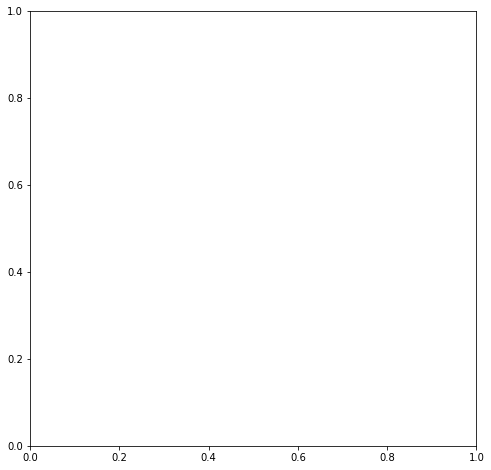

In [10]:
# Creating a scatter plot and formatting 
plt.figure(figsize=(8,8))
plt.scatter(range(len(first_period)), first_period, marker="o", facecolors="blue", edgecolors="black", linewidths =1,
             alpha=0.75, label="GDPvsCO2")
plt.scatter(range(len(second_period)), second_period, marker="o", facecolors="red", edgecolors="black", linewidths =1,
             alpha=0.75, label="GDPvsCO2")

plt.title("CO2 Emission vs. Global GDP Growth")
plt.xlabel("CO2 Emission")
plt.ylabel("GDP")


plt.grid()
plt.show()
plt.savefig("../Images/firstvssecond.png")
plt.show()

ValueError: x and y must be the same size

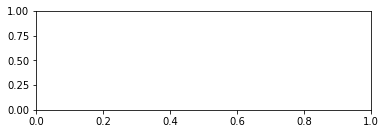

In [8]:
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(first_period)),first_period, label="population1")
    plt.scatter(range(len(second_period)), second_period, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="First Period")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Second Period")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return first_period, second_period